In [2]:

import geobench
if geobench.config._GEO_BENCH_DIR_ENV is None:
    print("Note: GEO_BENCH_DIR is not set. If this is not intended, this might be related on how jupyter loads environment variables.")
    print(f"Using GEO_BENCH_DIR={geobench.GEO_BENCH_DIR}")

import plot_tools
from pathlib import Path
import seaborn as sns

import pandas as pd
import os

%load_ext autoreload
%autoreload 2

Note: GEO_BENCH_DIR is not set. If this is not intended, this might be related on how jupyter loads environment variables.
Using GEO_BENCH_DIR=/mnt/home/dataset/geobench


## Classification

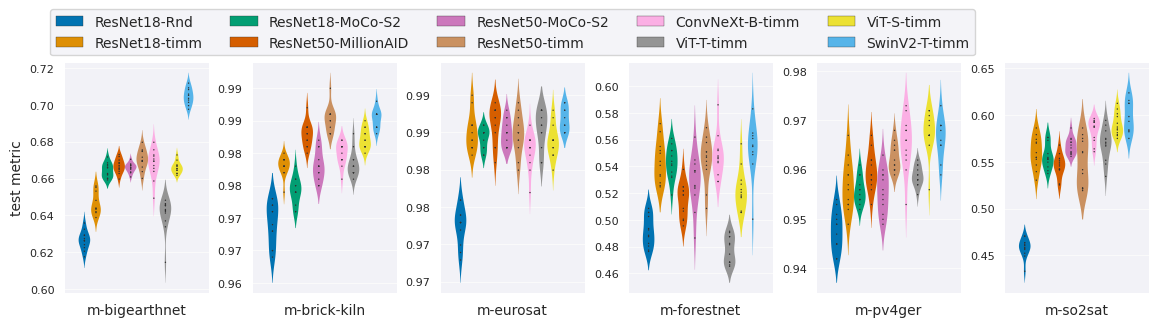

In [6]:

csv_path = Path(os.path.abspath('')).parent / "baseline_results.csv"
df = pd.read_csv(csv_path)
df = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()

model_order = "ResNet18-Rnd,ResNet18-timm,ResNet18-MoCo-S2,ResNet50-MillionAID,ResNet50-MoCo-S2,ResNet50-timm,ConvNeXt-B-timm,ViT-T-timm,ViT-S-timm,SwinV2-T-timm".split(",")
model_colors = dict( zip(model_order, sns.color_palette("colorblind")[:len(model_order)]))

plot_tools.plot_per_dataset(df, model_order, model_colors=model_colors, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)



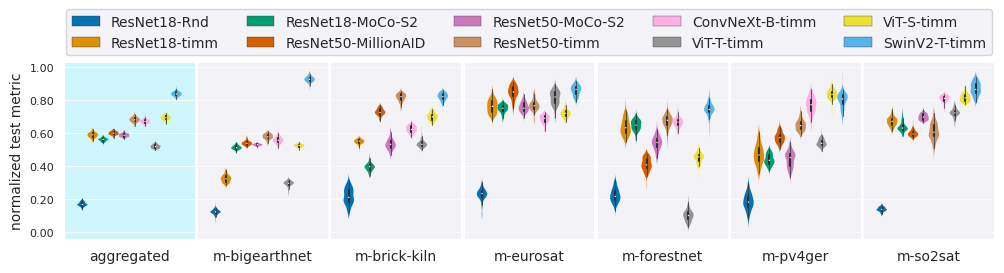

In [7]:

plot_tools.normalize_bootstrap_and_plot(df, metric="test metric",benchmark_name="classification_v1.0", model_order=model_order, model_colors=model_colors, fig_size=(12,2.3))



## Segmentation




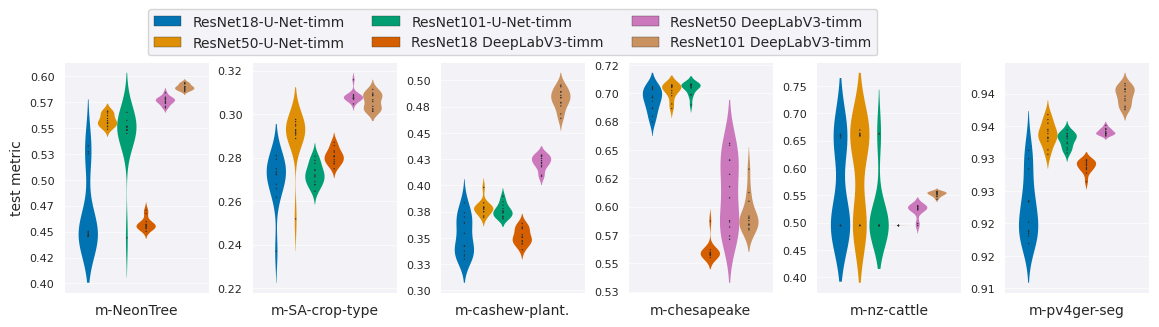

In [8]:

csv_path = Path(os.path.abspath('')).parent / "baseline_segmentation_results.csv"
df = pd.read_csv(csv_path)
df = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()

plot_tools.make_normalizer(df, benchmark_name="segmentation_v1.0")

model_order = 'ResNet18-U-Net-timm,ResNet50-U-Net-timm,ResNet101-U-Net-timm,ResNet18 DeepLabV3-timm,ResNet50 DeepLabV3-timm,ResNet101 DeepLabV3-timm'.split(',')
# colors = sns.color_palette("colorblind")
# colors = [colors[i] for i in [0,1,2,4,8,9]]
# model_colors = dict( zip(model_order, colors))

plot_tools.plot_per_dataset(df, model_order, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)



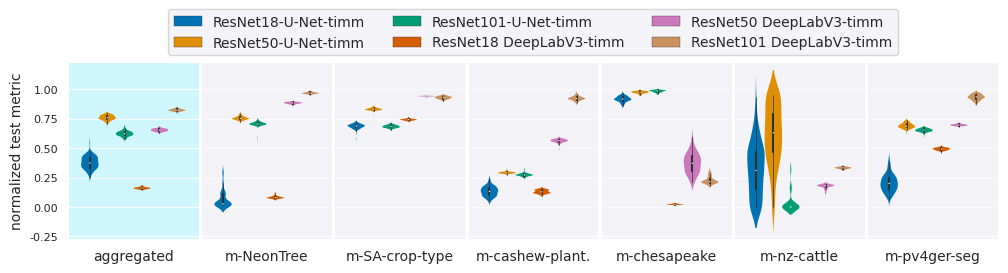

In [9]:
plot_tools.normalize_bootstrap_and_plot(df, metric="test metric",benchmark_name="segmentation_v1.0", model_order=model_order, fig_size=(12,2.3))
